##### 加入滑桿 ( Trackbar )
滑桿 ( Trackbar ) 又稱作滑動條、Slider bar，是一種可以用滑鼠調整數值的 UI 介面，這篇教學會介紹如何在 OpenCV 視窗中加入滑桿，\
並讀取滑桿數值，進一步調整影像的亮度和對比度。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 在視窗中加入滑桿 
透過 cv2.createTrackbar 方法，能夠 OpenCV 產生的指定視窗中加入滑桿，搭配 cv2.setTrackbarPos 方法，可以指定特定滑桿的初始值，使用方法如下：

In [ ]:
cv2.createTrackbar('滑桿名稱', '視窗名稱', min, max, fn)
# min 最小值 ( 最小為 0，不可為負值 )
# max 最大值
# fn 滑桿數值改變時要執行的函式

cv2.setTrackbarPos('滑桿名稱','視窗名稱', val)
# val 滑桿預設值

下方的程式碼會在視窗中加入一個數值區間為 0～255 的滑桿，當滑鼠調整滑桿時，就會印出對應的數值。

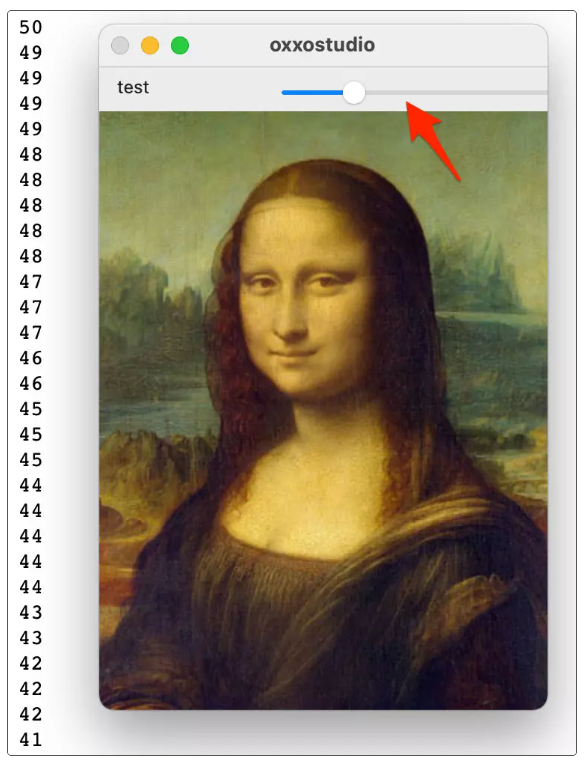

In [ ]:
import cv2

img = cv2.imread('image\Dog.jpg')
cv2.imshow('oxxostudio', img)

def test(val):
    print(val)

cv2.createTrackbar('test', 'oxxostudio', 0, 255, test)
cv2.setTrackbarPos('test', 'oxxostudio', 50)

keycode = cv2.waitKey(0)
cv2.destroyAllWindows()

##### 透過滑桿，調整影像亮度與對比度 
延伸「[調整影像的對比和亮度](https://steam.oxxostudio.tw/category/python/ai/opencv-adjust.html)」範例，將程式修改為調整滑桿時，可以調整影像的亮度和對比度。

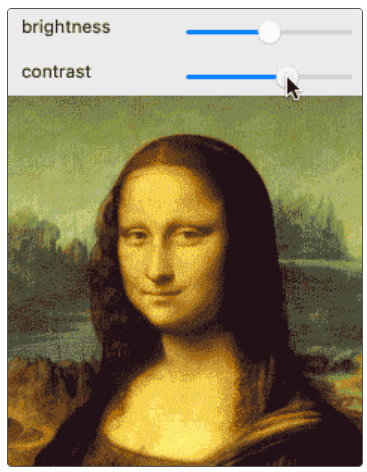

In [ ]:
import cv2
import numpy as np

img = cv2.imread('image\\Dog.jpg')

# 定義調整亮度對比的函式
def adjust(image, contrast, brightness): # 亮度和對比度調整函式
    output = image * (contrast / 100 + 1) - contrast + brightness  # 轉換公式
    output = np.clip(output, 0, 255)     # 限制輸出範圍在 0-255
    output = np.uint8(output)            # 轉換為 8 位無符號整數
    return output                        # 返回調整後的影像

# 定義滑桿回調函式
def on_trackbar(val):                                               # 滑桿回調函式
    contrast = cv2.getTrackbarPos('Contrast', 'Adjustments')        # 獲取滑桿數值
    brightness = cv2.getTrackbarPos('Brightness', 'Adjustments')    # 獲取滑桿數值
    adjusted_img = adjust(img, contrast - 50, brightness - 50)      # 調整亮度和對比度
    cv2.imshow('Adjustments', adjusted_img)                         # 顯示調整後的影像

# 創建一個窗口
cv2.namedWindow('Adjustments')

# 創建滑桿
cv2.createTrackbar('Contrast', 'Adjustments', 50, 100, on_trackbar)  # 初始值 50，範圍 0-100
cv2.createTrackbar('Brightness', 'Adjustments', 50, 100, on_trackbar)  # 初始值 50，範圍 0-100

# 顯示初始影像
cv2.imshow('Adjustments', img)

# 初始化滑桿回調函式
on_trackbar(0)

# 等待用戶操作
cv2.waitKey(0)
cv2.destroyAllWindows()